In [1]:
import os
import re
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# o stands for "old"
ofname = os.path.expandvars("$HOME/Software/HK_Software/WCSimFQTuningTools/Time/old_tools/11_tpdfhist.root")
fname  = os.path.expandvars("$HOME/Software/HK_Software/WCSimFQTuningTools/Time/tres_trueq_2Dhistogram.root")

of = uproot.open(ofname)
f  = uproot.open(fname)

print(f.classnames())
print(of.classnames())

{'htimepdf_direct_100.509697;1': 'TH2D', 'htimepdf_total_100.509697;1': 'TH2D', 'htimepdf_direct_120.509918;1': 'TH2D', 'htimepdf_total_120.509918;1': 'TH2D', 'htimepdf_direct_140.510071;1': 'TH2D', 'htimepdf_total_140.510071;1': 'TH2D', 'htimepdf_direct_160.510193;1': 'TH2D', 'htimepdf_total_160.510193;1': 'TH2D', 'htimepdf_direct_180.510269;1': 'TH2D', 'htimepdf_total_180.510269;1': 'TH2D', 'htimepdf_direct_200.510345;1': 'TH2D', 'htimepdf_total_200.510345;1': 'TH2D', 'htimepdf_direct_220.510406;1': 'TH2D', 'htimepdf_total_220.510406;1': 'TH2D', 'htimepdf_direct_240.510452;1': 'TH2D', 'htimepdf_total_240.510452;1': 'TH2D', 'htimepdf_direct_260.510498;1': 'TH2D', 'htimepdf_total_260.510498;1': 'TH2D', 'htimepdf_direct_280.510529;1': 'TH2D', 'htimepdf_total_280.510529;1': 'TH2D', 'htimepdf_direct_300.510559;1': 'TH2D', 'htimepdf_total_300.510559;1': 'TH2D', 'htimepdf_direct_320.510590;1': 'TH2D', 'htimepdf_total_320.510590;1': 'TH2D', 'htimepdf_direct_340.510620;1': 'TH2D', 'htimepdf_t

In [3]:
# read 2D histogram
p = 700.510803
H ,  tresbins, trueqbins           =  f[f"htimepdf_direct_{p}"].to_numpy()
oH, otresbins, otrueqbins, mombins = of["hist_tpdf"].to_numpy()

assert (tresbins  == otresbins).all()
assert (trueqbins == otrueqbins).all()

pidx = np.digitize(p, mombins) - 1

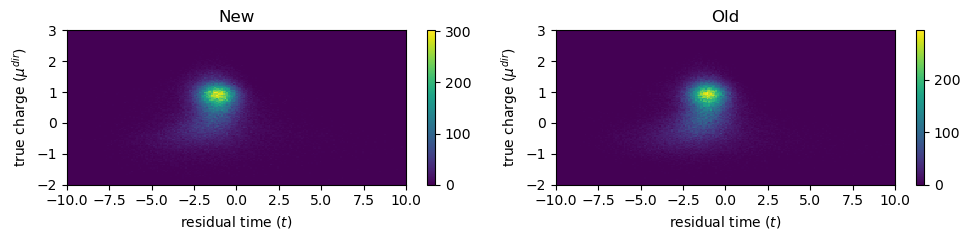

In [4]:
plt.figure(figsize=[10, 2.5])

# new
plt.subplot(121)
plt.title("New")
plt.pcolormesh(tresbins, trueqbins, H.T)
plt.xlabel(r"residual time ($t$)")
plt.ylabel(r"true charge ($\mu^{dir}$)")
plt.colorbar()

# old
plt.subplot(122)
plt.title("Old")
plt.pcolormesh(otresbins, otrueqbins, oH[:, :, pidx].T)
plt.xlabel(r"residual time ($t$)")
plt.ylabel(r"true charge ($\mu^{dir}$)")
plt.colorbar()

plt.tight_layout()

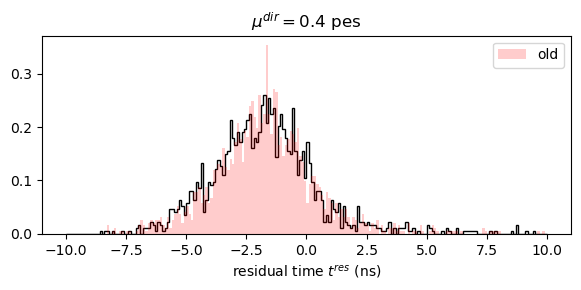

In [5]:
# proyection tres
mu = 0.4
true_q = np.log10(mu)
i = np.digitize(true_q, trueqbins) - 1

plt.figure(figsize=[6, 3])

plt.title(r"$\mu^{dir}" + f"= {mu}$ pes")

proj = H[:, i]
norm = np.sum(proj * (tresbins[1:] - tresbins[:-1]))
plt.stairs(proj/norm, tresbins, color="k")

proj = oH[:, i, pidx]
norm = np.sum(proj * (tresbins[1:] - tresbins[:-1]))
plt.stairs(proj/norm, otresbins, alpha=0.2, fill=True, label='old', color="r")

plt.xlabel(r"residual time $t^{res}$ (ns)")
plt.legend()
plt.tight_layout()

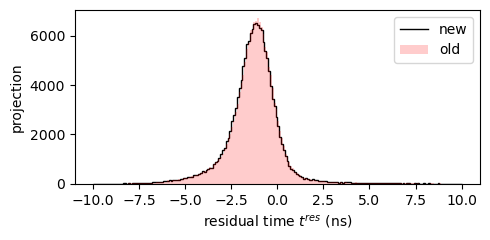

In [6]:
# proyection tres
plt.figure(figsize=[5, 2.5])

plt.stairs(H.sum(axis=1), tresbins, label='new', color="k")
plt.stairs(oH[:, :, pidx].sum(axis=1), otresbins, alpha=0.2, fill=True, label='old', color="r")

plt.xlabel(r"residual time $t^{res}$ (ns)")
plt.ylabel(r"projection")
plt.legend()
plt.tight_layout()

Total [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
PC [426. 470. 511. 521. 541. 580. 587. 628. 640. 632. 670. 680. 684. 694.
 704. 716. 739. 722. 759. 754. 771. 765. 794. 759. 788. 782. 795. 787.
 790. 811. 820. 814. 829. 808. 827. 833. 842. 858. 838. 869. 833. 849.
 874. 839. 869. 861.]


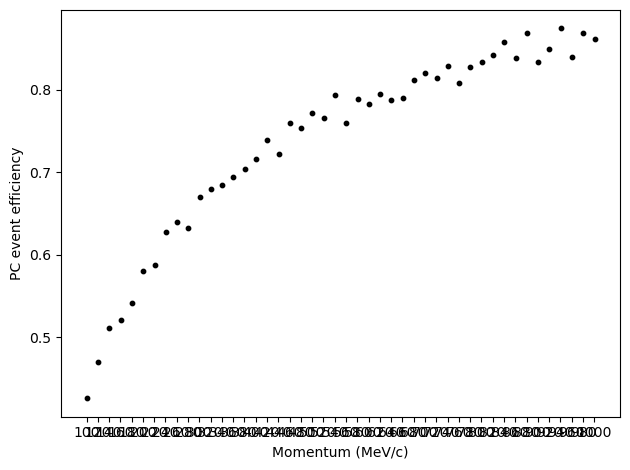

In [7]:
momenta, ntotal = f["Total"].values()
momenta, npc    = f["PC"]   .values()

print("Total", ntotal)
print("PC", npc)

plt.figure()

plt.scatter(momenta, npc/ntotal, s=10, color="k")

plt.xlabel("Momentum (MeV/c)")
plt.ylabel("PC event efficiency")

plt.xticks(np.round(momenta)-1)

plt.tight_layout()

In [ ]:
import ROOT
rootf = ROOT.TFile(fname)
th2d = rootf.Get(f"htimepdf_{p}")

xi, yi = np.random.randint(H.shape[0]), np.random.randint(H.shape[1])

x = th2d.GetXaxis().GetBinLowEdge(xi + 1)
y = th2d.GetYaxis().GetBinLowEdge(yi + 1)

print("  ROOT:", x, y, th2d.GetBinContent(xi+1, yi+1))
print("uproot:", tresbins[xi], trueqbins[yi], H[xi, yi])